### Extracción de indicadores del Sistema de Indicadores de la Ciudad de México

Este script extrae los indicadores del Sistema de Indicadores de la Ciudad de México. La información se obtiene de la página web https://indicadores.cdmx.gob.mx/dataset/. Se extraen los siguientes campos:
- Título
- Descripción
- Instrumento
- Derecho
- ODS
- Fuente
- URL de la fuente

In [103]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

### Funciones

In [316]:
def contar_ind_palabra_clave(tabla, *palabras):
    if not palabras:
        print("Debes ingresar al menos una palabra clave.")
        return

    expresion = "|".join(palabras)  # Une las palabras con OR lógico
    coincidencias = tabla[tabla['titulo'].str.contains(expresion, case=False, na=False, regex=True)]
    total = len(coincidencias)
    porcentaje = total / len(tabla) * 100
    print(f"Total de indicadores que contienen la(s) palabra(s) {palabras}: {total} ({porcentaje:.1f}%)")



### Extracción de información del sitio web

In [104]:
headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Safari/537.36'}

In [105]:
# # Initialize lists to store the data
# titulos = []
# descripcion = []
# instrumento = []
# derecho = []
# ods = []
# fuente = []
# fuente_url = []
#
# # Loop de 33 páginas
# for page in range(1, 34):
#     url_basica = f"https://indicadores.cdmx.gob.mx/dataset/?page={page}"
#
#     # Petición a la página y parseo con BeautifulSoup
#     r = requests.get(url_basica, headers=headers, verify=False)
#     sopa = BeautifulSoup(r.text, "html.parser")
#
#     # Objetivo de la extracción
#     resultados = sopa.find_all("div", class_="col-sm-12")
#
#     # Extraer los datos de cada indicador
#     for datos in resultados:
#         # Título
#         h2_tag = datos.find('h2', class_='cp-section-heading cp-default-section-heading cp-section-anchored-heading')
#         if h2_tag:
#             cleaned_text = h2_tag.text.strip()
#             titulos.append(cleaned_text)
#
#         # Descripción
#         p_tag = datos.find('p')
#         if p_tag:
#             cleaned_text = p_tag.text.strip()
#             descripcion.append(cleaned_text)
#
#         #instrumento, derecho, ods
#         a_tags = datos.find_all('a')
#         if len(a_tags) >= 1:
#             instrumento.append(a_tags[0].text.strip())
#         if len(a_tags) >= 2:
#             derecho.append(a_tags[1].text.strip())
#         if len(a_tags) >= 3:
#             ods.append(a_tags[2].text.strip())
#
#         # Fuente y URL de la fuente
#         fuente_tag = datos.find('div', id='fuente')
#         if fuente_tag:
#             fuente_text = fuente_tag.find('a')
#             if fuente_text:
#                 fuente.append(fuente_text.text.strip())
#                 fuente_url.append(fuente_text['href'])

In [106]:
# Inicializar listas
titulos = []
descripcion = []
instrumento = []
derecho = []
ods = []
fuente = []
fuente_url = []



# Loop por 33 páginas
for page in range(1, 34):
    url_basica = f"https://indicadores.cdmx.gob.mx/dataset/?page={page}"

    # Petición a la página y parseo con BeautifulSoup
    r = requests.get(url_basica, headers=headers, verify=False)
    sopa = BeautifulSoup(r.text, "html.parser")

    # Resultados
    resultados = sopa.find_all("div", class_="col-sm-12")

    # Extraer los datos
    for datos in resultados:
        # Título
        h2_tag = datos.find('h2', class_='cp-section-heading cp-default-section-heading cp-section-anchored-heading')
        if h2_tag:
            titulos.append(h2_tag.text.strip())
        else:
            titulos.append("")

        # Descripción
        p_tag = datos.find('p')
        if p_tag:
            descripcion.append(p_tag.text.strip())
        else:
            descripcion.append("")

        # Inicializar variables locales para este registro
        instrumento_val = ""
        derecho_val = ""
        ods_val = ""

        # Buscar tags
        tags_divs = datos.find_all("div", class_="tags")
        for tag_div in tags_divs:
            tag_text = tag_div.get_text(strip=True)

            if "Instrumento:" in tag_text:
                a = tag_div.find('a')
                if a:
                    instrumento_val = a.text.strip()

            elif "Derecho de la Constitución Política de la CDMX" in tag_text:
                a = tag_div.find('a')
                if a:
                    derecho_val = a.text.strip()

            elif "Objetivo de Desarrollo Sostenible" in tag_text:
                a = tag_div.find('a')
                if a:
                    ods_val = a.text.strip()

        instrumento.append(instrumento_val)
        derecho.append(derecho_val)
        ods.append(ods_val)

        # Fuente y URL
        fuente_tag = datos.find('div', id='fuente')
        if fuente_tag:
            a_tag = fuente_tag.find('a')
            if a_tag:
                fuente.append(a_tag.text.strip())
                fuente_url.append(a_tag['href'])
            else:
                fuente.append("")
                fuente_url.append("")
        else:
            fuente.append("")
            fuente_url.append("")


C:\Users\claud\miniconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'indicadores.cdmx.gob.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\claud\miniconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'indicadores.cdmx.gob.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\claud\miniconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'indicadores.cdmx.gob.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\claud\miniconda3\Lib\s

In [107]:
# Crea tabla
tabla_indicadores = pd.DataFrame({
    "titulo": titulos,
    "descripcion": descripcion,
    "instrumento": instrumento,
    "derecho": derecho,
    "ods": ods,
    "fuente": fuente,
    "fuente_url": fuente_url
})

In [108]:
#Eliminar duplicados de nombre
tabla_indicadores = tabla_indicadores.drop_duplicates(subset='titulo')
#Eliminar acentos y espacios en blanco de la columna 'instrumento'
tabla_indicadores['instrumento'] = tabla_indicadores['instrumento'].str.replace('á', 'a').str.replace('é', 'e').str.replace('í', 'i').str.replace('ó', 'o').str.replace('ú', 'u')
#Resetear index
tabla_indicadores.reset_index(drop=True, inplace=True)
#Eliminar index 1
tabla_indicadores = tabla_indicadores.drop(index=1)
#Minúsculas en todas las columnas
tabla_indicadores = tabla_indicadores.apply(lambda x: x.astype(str).str.lower())
#Eliminar acentos
tabla_indicadores = tabla_indicadores.apply(lambda x: x.str.replace('á', 'a').str.replace('é', 'e').str.replace('í', 'i').str.replace('ó', 'o').str.replace('ú', 'u'))
tabla_indicadores

,titulo,descripcion,instrumento,derecho,ods,fuente,fuente_url
0,flujo de remesas,ingresos en millones de dolares por envio de r...,pgd,derecho de acceso a la justicia,"paz, justicia e instituciones solidas",banxico,https://www.banxico.org.mx/sieinternet/consult...
2,remesas en gustavo a. madero,informacion trimestral relativa a ingresos por...,visor alcaldias,no vinculado,trabajo decente y crecimiento economico,"sistema de informacion economica, banxico",https://www.banxico.org.mx/sieinternet/consult...
3,remesas en alvaro obregon,informacion trimestral relativa a ingresos por...,visor alcaldias,no vinculado,trabajo decente y crecimiento economico,"sistema de informacion economica, banxico",https://www.banxico.org.mx/sieinternet/consult...
4,remesas en tlahuac,informacion trimestral relativa a ingresos por...,visor alcaldias,no vinculado,trabajo decente y crecimiento economico,"sistema de informacion economica, banxico",https://www.banxico.org.mx/sieinternet/consult...
5,remesas en coyoacan,informacion trimestral relativa a ingresos por...,visor alcaldias,no vinculado,trabajo decente y crecimiento economico,"sistema de informacion economica, banxico",https://www.banxico.org.mx/sieinternet/consult...
...,...,...,...,...,...,...,...
639,miembros del sistema de divulgacion y apropiac...,numero de miembros del sistema de divulgacion ...,pdcti,derecho a la ciencia y a la innovacion tecnolo...,educacion de calidad,"sectei; , conacyt",https://www.sectei.cdmx.gob.mx/
640,porcentaje de entidades y dependencias con pro...,"en el 2020, 8 entidades y dependencias tienen ...",pdcti,derecho a la ciencia y a la innovacion tecnolo...,"industria, innovacion e infraestructura","lopeap, apcdmx, portal de transparencia de la ...",no disponible
641,superficie de las colonias con un nivel de equ...,superficie total de las colonias con un nivel ...,pgot,derecho a la ciudad,"industria, innovacion e infraestructura",centrogeo,no disponible
642,porcentaje de empresas que realizaron proyecto...,porcentaje de empresas que realizaron proyecto...,pdcti,derecho a la ciencia y a la innovacion tecnolo...,"industria, innovacion e infraestructura","inegi, encuesta sobre investigacion y desarrol...",https://www.inegi.org.mx/programas/esidet/2017/


In [109]:
print("Total de indicadores extraídos:", len(tabla_indicadores))

Total de indicadores extraídos: 643


In [110]:
#Salvar como csv
tabla_indicadores.to_csv("indicadores_sid_cdmx.csv", index=False, encoding='utf-8-sig')

### Análisis descriptivo

In [111]:
### Total de instrumentos
print("Total de instrumentos:", len(tabla_indicadores['instrumento'].unique()))

Total de instrumentos: 10


In [301]:
### Total de derechos
print("Total de derechos de la Constitución Política de la CDMX:", len(tabla_indicadores['derecho'].unique()))

Total de derechos de la Constitución Política de la CDMX: 38


In [113]:
#Listado de derechos
print("Listado de derechos de la Constitución Política de la CDMX:")
for derecho in tabla_indicadores['derecho'].unique():
    print(f"- {derecho}")
#Guardar en csv
pd.DataFrame(sorted(tabla_indicadores['derecho'].unique())).to_csv("derechos.csv", index=False, header=False,encoding="latin-1")

Listado de derechos de la Constitución Política de la CDMX:
- derecho de acceso a la justicia
- no vinculado
- derecho a un medio ambiente sano
- derecho a la ciencia y a la innovacion tecnologica
- derecho al trabajo
- derecho a la salud
- derecho a una vida libre de todo tipo de violencia o discriminacion
- derecho a la vida digna
- derecho a la alimentacion y a la nutricion
- derecho a la educacion
- derecho a la seguridad ciudadana y a la prevencion de la violencia y del delito
- derechos laborales
- economia, trabajo y seguridad social
- derecho a la buena administracion publica
- derecho a la via publica
- derecho a la vivienda
- derechos de personas de identidad indigena
- derechos de personas con discapacidad
- derechos de las mujeres
- derecho al agua y a su saneamiento
- derechos de las personas en situacion de calle
- derechos de personas mayores
- derechos de las personas migrantes y sujetas de proteccion internacional
- derechos de las niñas, niños y adolescentes
- derecho

In [114]:
#Filtrar si derecho es ""
tabla_indicadores[tabla_indicadores['derecho'] == ""]

,titulo,descripcion,instrumento,derecho,ods,fuente,fuente_url
530,viviendas en azcapotzalco por numero de cuartos,la cantidad de cuartos que tienen las vivienda...,,,reduccion de las desigualdades,censo de poblacion y vivienda,https://www.inegi.org.mx/programas/ccpv/2020/
548,viviendas en azcapotzalco por numero de dormit...,total de viviendas segun el numero de cuartos ...,,,reduccion de las desigualdades,censo de poblacion y vivienda,https://www.inegi.org.mx/programas/ccpv/2020/


In [115]:
#Filtrar aquel que tenga ods Secretaría de Turismo
tabla_indicadores[tabla_indicadores['derecho'].str.contains("Economía, Trabajo y Seguridad social")]

,titulo,descripcion,instrumento,derecho,ods,fuente,fuente_url


In [116]:
##Total de ODS
print("Total de ODS:", len(tabla_indicadores['ods'].unique()))
for objetivo in tabla_indicadores['ods'].unique():
    print(f"- {objetivo}")
#Guardar en csv
pd.DataFrame(sorted(tabla_indicadores['ods'].unique())).to_csv("ods.csv", index=False, header=False,encoding="latin-1")

Total de ODS: 19
- paz, justicia e instituciones solidas
- trabajo decente y crecimiento economico
- accion por el clima
- industria, innovacion e infraestructura
- salud y bienestar
- fin de la pobreza
- reduccion de las desigualdades
- educacion de calidad
- ciudades y comunidades sostenibles
- 
- hambre cero
- igualdad de genero
- agua limpia y saneamiento
- produccion y consumo responsables
- vida de ecosistemas terrestres
- energia asequible y no contaminante
- paz, justicia e instituciones solidasderechos humanos, seguridad y justicia
- alianzas para lograr los objetivos
- no vinculado


In [117]:
#Filtrar aquel que tenga ods Secretaría de Turismo
tabla_indicadores[tabla_indicadores['instrumento'].str.contains("Visor Alcaldias")]

,titulo,descripcion,instrumento,derecho,ods,fuente,fuente_url


In [120]:
plt.rcParams['font.family'] = 'Poppins'

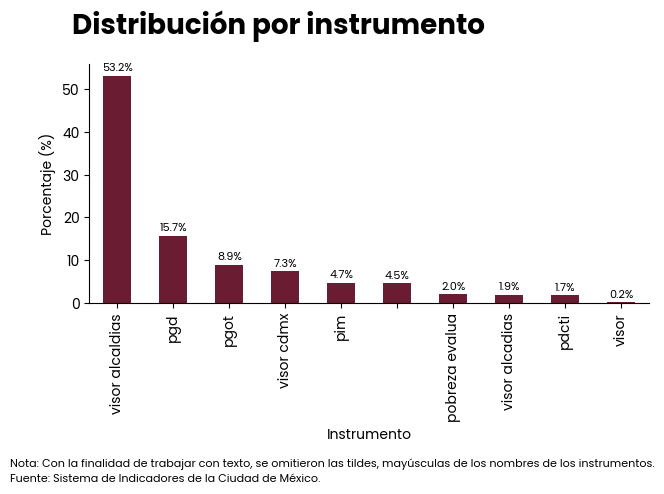

In [170]:
# Use full path to Roboto

tabla_indicadores['instrumento'].value_counts(normalize=True).mul(100).plot.bar(color="#691c32")

#plt.title('Distribución por instrumento',  fontweight='bold', fontsize=20)
plt.text(-0.8, tabla_indicadores['instrumento'].value_counts(normalize=True).mul(100).max() + 10,
         'Distribución por instrumento',
         fontsize=20, fontweight='bold', ha='left')

plt.ylabel('Porcentaje (%)')
plt.xlabel('Instrumento')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.figtext(
    0.985, -0.02,
    "Nota: Con la finalidad de trabajar con texto, se omitieron las tildes, mayúsculas de los nombres de los instrumentos.",
    ha='right', fontsize=8
)


plt.figtext(
    0.22, -0.05,
    "Fuente: Sistema de Indicadores de la Ciudad de México.",
    ha='center', fontsize=8
)

#Añadir etiquetas a las barras
for index, value in enumerate(tabla_indicadores['instrumento'].value_counts(normalize=True).mul(100)):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
#Salvar la figura
plt.savefig("distribucion_por_instrumento.png", bbox_inches='tight', dpi=300)


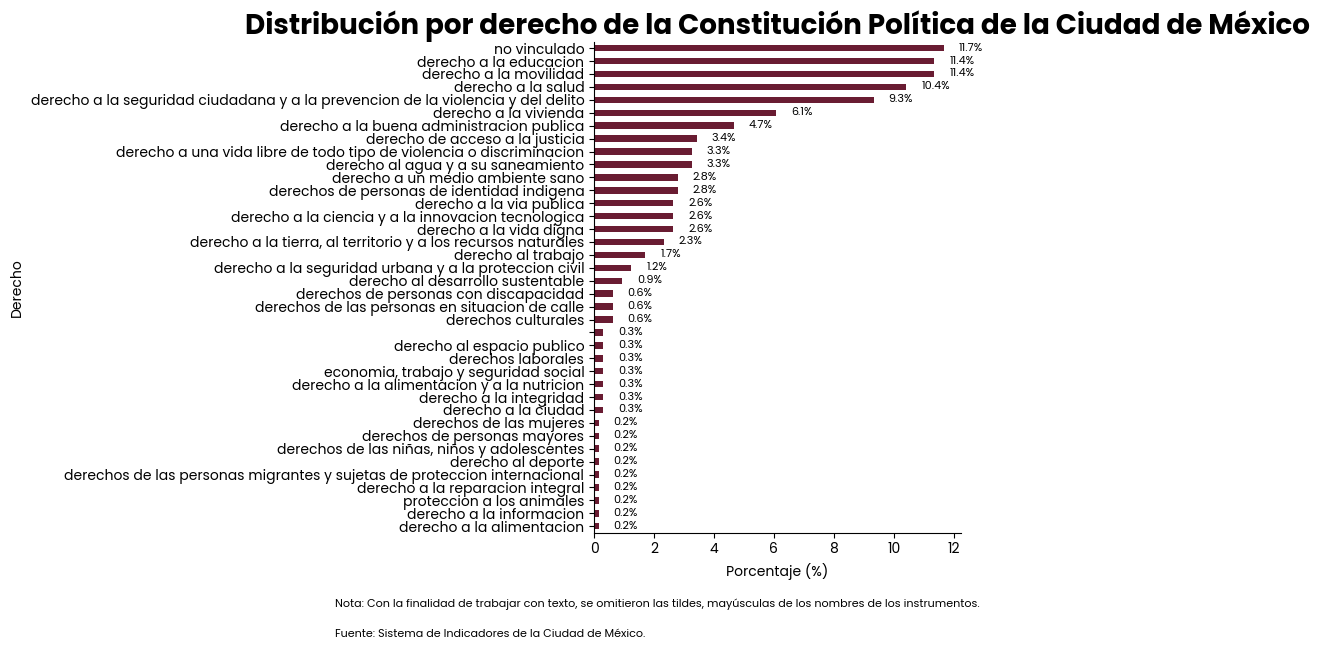

In [233]:
data = tabla_indicadores['derecho'].value_counts(normalize=True).mul(100).sort_values(ascending=False)

data.plot.barh(color="#691c32", figsize=(10, 6))
plt.gca().invert_yaxis()
plt.title('Distribución por derecho de la Constitución Política de la Ciudad de México',
          fontweight='bold', fontsize=20, va="center_baseline")



# Axis labels
plt.xlabel('Porcentaje (%)')
plt.ylabel('Derecho')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Fuente
plt.figtext(
    0.985, -0.02,
    "Nota: Con la finalidad de trabajar con texto, se omitieron las tildes, mayúsculas de los nombres de los instrumentos.",
    ha='right', fontsize=8
)

plt.figtext(
    0.495, -0.07,
    "Fuente: Sistema de Indicadores de la Ciudad de México.",
    ha='center', fontsize=8
)

# Add labels to the bars
for i, (index, value) in enumerate(data.items()):
    plt.text(value + 0.5, i, f'{value:.1f}%', va='center', fontsize=8)

plt.tight_layout()

# Save figure
plt.savefig("distribucion_por_derecho.png", bbox_inches='tight', dpi=100)


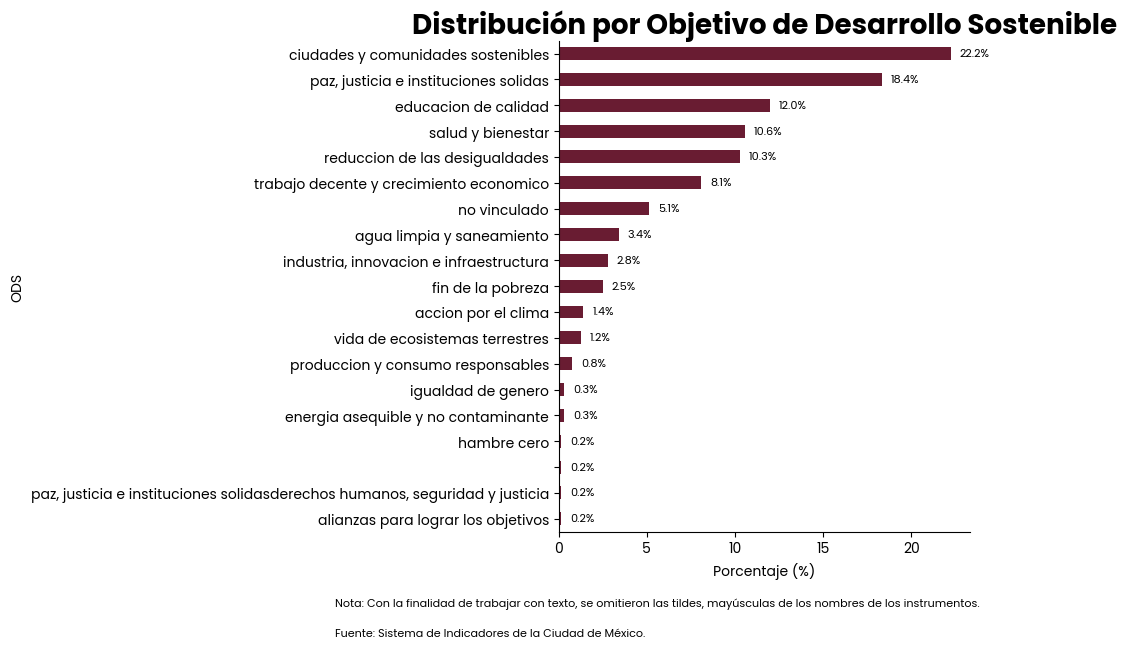

In [312]:
data_ods = tabla_indicadores['ods'].value_counts(normalize=True).mul(100).sort_values(ascending=False)

data_ods.plot.barh(color="#691c32", figsize=(10, 6))
plt.gca().invert_yaxis()
plt.title('Distribución por Objetivo de Desarrollo Sostenible',
          fontweight='bold', fontsize=20, va="center_baseline")



# Axis labels
plt.xlabel('Porcentaje (%)')
plt.ylabel('ODS')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Fuente
plt.figtext(
    0.985, -0.02,
    "Nota: Con la finalidad de trabajar con texto, se omitieron las tildes, mayúsculas de los nombres de los instrumentos.",
    ha='right', fontsize=8
)

plt.figtext(
    0.495, -0.07,
    "Fuente: Sistema de Indicadores de la Ciudad de México.",
    ha='center', fontsize=8
)

# Add labels to the bars
for i, (index, value) in enumerate(data_ods.items()):
    plt.text(value + 0.5, i, f'{value:.1f}%', va='center', fontsize=8)

plt.tight_layout()

# Save figure
plt.savefig("distribucion_por_ods.png", bbox_inches='tight', dpi=100)

In [317]:
## Indicadores relacionados con población vulnerable
contar_ind_palabra_clave(tabla_indicadores, "mujer")
contar_ind_palabra_clave(tabla_indicadores, "pueblo")
contar_ind_palabra_clave(tabla_indicadores, "indigena")
contar_ind_palabra_clave(tabla_indicadores, "niños")
contar_ind_palabra_clave(tabla_indicadores, "adolescente")
contar_ind_palabra_clave(tabla_indicadores, "personas mayores")
contar_ind_palabra_clave(tabla_indicadores, "situacion de calle")
contar_ind_palabra_clave(tabla_indicadores, "lgbttti")
contar_ind_palabra_clave(tabla_indicadores, "discapacidad")
contar_ind_palabra_clave(tabla_indicadores, "adolescente")
contar_ind_palabra_clave(tabla_indicadores, "migrante")
contar_ind_palabra_clave(tabla_indicadores, "asistencia social")

Total de indicadores que contienen la(s) palabra(s) ('mujer',): 4 (0.6%)
Total de indicadores que contienen la(s) palabra(s) ('pueblo',): 1 (0.2%)
Total de indicadores que contienen la(s) palabra(s) ('indigena',): 19 (3.0%)
Total de indicadores que contienen la(s) palabra(s) ('niños',): 1 (0.2%)
Total de indicadores que contienen la(s) palabra(s) ('adolescente',): 2 (0.3%)
Total de indicadores que contienen la(s) palabra(s) ('personas mayores',): 1 (0.2%)
Total de indicadores que contienen la(s) palabra(s) ('situacion de calle',): 1 (0.2%)
Total de indicadores que contienen la(s) palabra(s) ('lgbttti',): 0 (0.0%)
Total de indicadores que contienen la(s) palabra(s) ('discapacidad',): 2 (0.3%)
Total de indicadores que contienen la(s) palabra(s) ('adolescente',): 2 (0.3%)
Total de indicadores que contienen la(s) palabra(s) ('migrante',): 1 (0.2%)
Total de indicadores que contienen la(s) palabra(s) ('asistencia social',): 1 (0.2%)


In [325]:
for indicador in tabla_indicadores[tabla_indicadores['titulo'].str.contains("porcentaje", case=False, na=False)]['titulo']:
    print(indicador)

porcentaje de poblacion de 15 años y mas en rezago educativo
porcentaje de la poblacion con desarrollo social bajo o muy bajo
porcentaje de poblacion en situacion de pobreza de ingresos
porcentaje de la poblacion en pobreza por el componente de ingreso
porcentaje de la poblacion en situacion de pobreza multidimensional
porcentaje de poblacion en situacion de pobreza extrema multidimensional
porcentaje de la poblacion en situacion de pobreza multidimensional extrema
porcentaje de poblacion en situacion de pobreza de adecuacion sanitaria
porcentaje de poblacion en situacion de pobreza de calidad y espacios de la vivienda
porcentaje del personal ocupado en manufactura
porcentaje del personal ocupado en servicios profesionales, cientificos y tecnicos
porcentaje del personal ocupado en restaurantes y servicios de alojamiento
porcentaje del personal ocupado en la rama de la construccion
porcentaje de la poblacion ocupada con mas de 3 salarios minimos
porcentaje del personal ocupado en servic

#### Identificación de indicadores con nombre "correcto"
Para este caso se buscan aquellos que en su  nombre contengan las palabras porcentaje, tasa, índice

In [319]:
contar_ind_palabra_clave(tabla_indicadores, "porcentaje", "tasa", "indice", "razon")

Total de indicadores que contienen la(s) palabra(s) ('porcentaje', 'tasa', 'indice', 'razon'): 197 (30.6%)


In [326]:
#Filtrar aquellos indicadores que no contienen las palabras porcentaje, tasa, indice o razon
for indicador in tabla_indicadores[~tabla_indicadores['titulo'].str.contains("porcentaje|tasa|indice|razon", case=False, na=False)]['titulo']:
    print(indicador)

flujo de remesas
remesas en gustavo a. madero
remesas en alvaro obregon
remesas en tlahuac
remesas en coyoacan
remesas en iztacalco
remesas en iztapalapa
remesas en magdalena contreras
remesas en milpa alta
remesas en tlalpan
remesas en xochimilco
remesas en benito juarez
remesas en cuauhtemoc
remesas en miguel hidalgo
remesas en venustiano carranza
remesas en cuajimalpa
remesas en azcapotzalco
numero de incendios forestales
numero de solicitudes de patentes realizadas por mexicanos en la ciudad de mexico
cifra negra de delitos
empleos en el imss
esperanza de vida al nacimiento
atencion a personas privadas de su libertad en programas de capacitacion y actividades productivas
coeficiente de gini del ingreso corriente total per capita sin transferencias publicas
creacion de empleos formales
inflacion
escolaridad promedio
poblacion ocupada con acceso a servicios de salud
mujeres economicamente activas
poblacion economicamente activa de la ciudad de mexico
personas en iztacalco que conside